In [1]:
from dsmc_mono import DSMC_Mono

from timeit import default_timer as timer

import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook'])

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern Serif"
})


In [2]:
sim = DSMC_Mono(1_000_00)
sim_time = 1000.0
time_array = np.asarray([sim.t])
Temp_array = np.asarray([sim.temperature])
NcolCum_array = np.asarray([sim.nc])
Delta_Nc = sim.nc
Ncol_array = np.asarray([Delta_Nc])

start = timer()
while sim.t < sim_time:
    perc = 100*sim.t / sim_time
    nc_prev = sim.nc
    sim.make_step()
    time_array = np.append(time_array, sim.t)
    Temp_array = np.append(Temp_array, sim.temperature)
    NcolCum_array = np.append(NcolCum_array, sim.nc)
    Delta_Nc = sim.nc - nc_prev
    Ncol_array = np.append(Ncol_array, Delta_Nc)
    end = timer()
    elapsed = end - start
    left = (100/(perc+0.1) - 1)*elapsed
    print(f" Simulating: {perc:3.2f}% - {elapsed:.2f} sec (~{left:.2f} sec), time: {sim.t:.3f}, dt: {sim.dt:.3f}, temperature: {sim.temperature:.3f}, collisions: {Delta_Nc}, total collisions: {sim.nc}", end='\r', flush=True)

print("")
print("Finished simulation")
    

Initializing system...
...
Number of simulated particles:       N = 100_000
Linear sizes of the system:          Lx = 171.00 (m), Ly = 171.00 (m), Lz = 171.00 (m)
Volume of the simulated space:       V = 5_000_000.00 (m^3)
Number of boxes:                     Nx = 20, Ny = 20, Nz = 20
Linear size of a box:                L_box = 8.55 (m)
Volume of a box:                     V_box = 625.00 (m^3)
Total number of boxes:               N_total = 8_000
Average number of particles per box: Nbox = 12.50
Number density:                      n = 0.02 (1/m^3)
Particles' radii:                    R = 0.05 (m)
Particles' mass densities:           rho = 900.00 (kg/m^3)
Particles' masses:                   m = 0.47 (kg)
Coefficient of restitution:          eps = 0.60
...
Coordinates and velocities are distributed
...
Data structure are initialized
...
Initial temperature:                 9.97 (J)
Sampled temperature:                 9.97 (J)
Mass density of the system:          0.00942 (kg/m^3)
Press

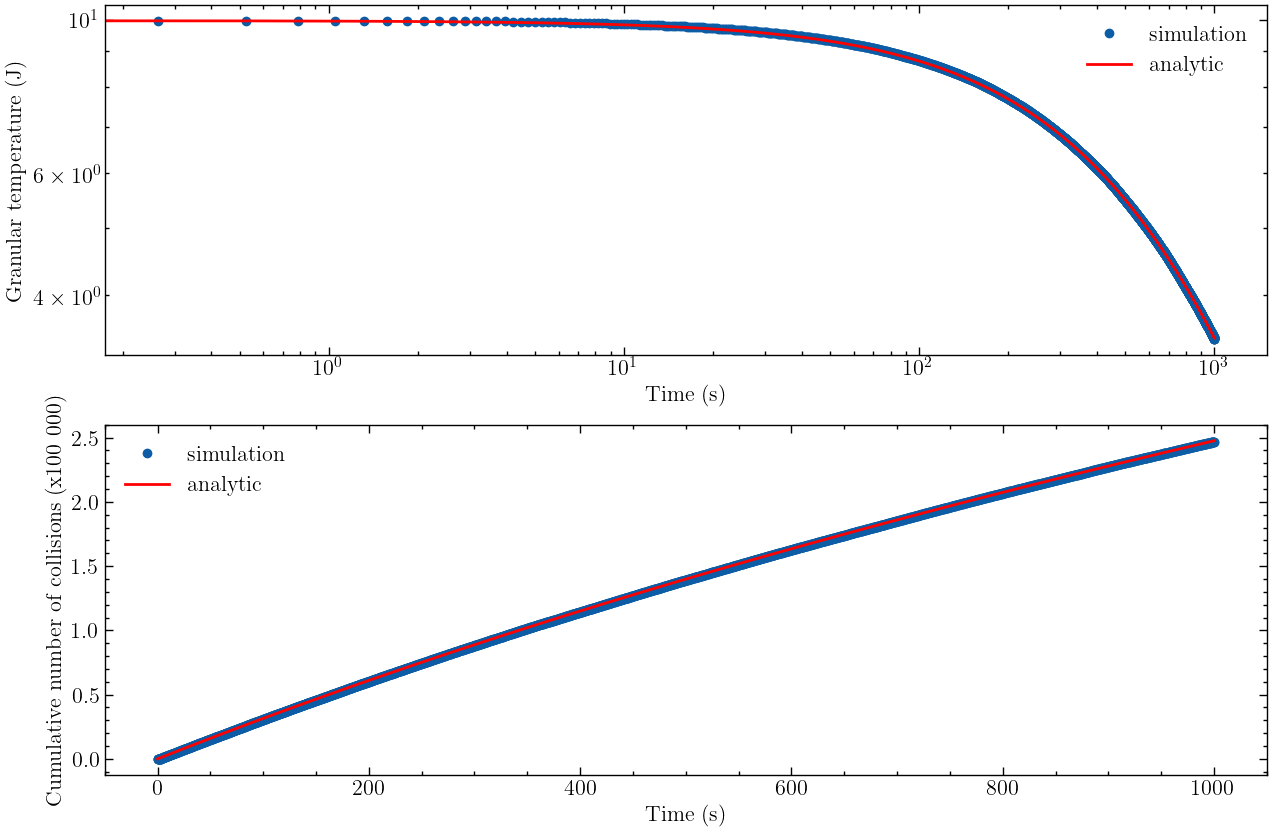

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figheight(10)
fig.set_figwidth(15)

ax1.plot(time_array, Temp_array, 'o' ,label='simulation')
ax1.plot(time_array, sim.haff_cooling(time_array), label='analytic', color='red')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Granular temperature (J)")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.legend()

ax2.plot(time_array, NcolCum_array/sim.N_particles, 'o', label='simulation')
ax2.plot(time_array, sim.ncol_analytic(time_array)/sim.N_particles, label='analytic', color='red')
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Cumulative number of collisions (x100 000)")
ax2.legend()

In [11]:
n_z = np.ndarray((sim.Nz), dtype=np.float64)

for iz in range(sim.Nz):
    nz_layer = 0
    for ix, iy in zip(range(sim.Nx), range(sim.Ny)):
        nz_layer += sim.box_particles[ix,iy,iz].size
    n_z[iz] = nz_layer/(sim.V_box*sim.Nx*sim.Ny)

(0.0, 0.002)

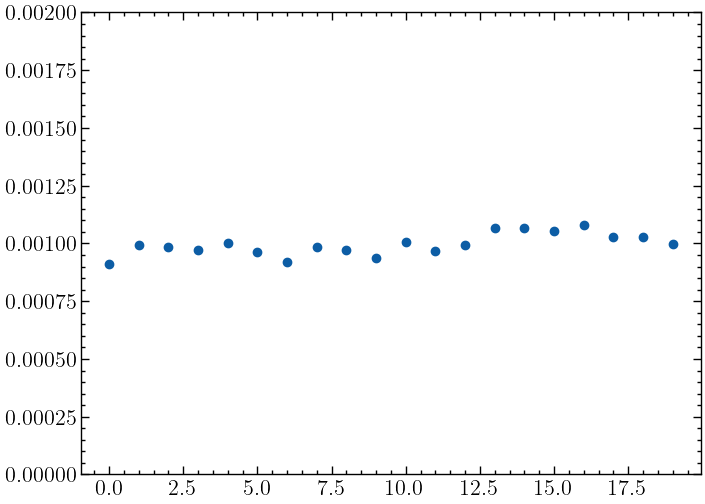

In [19]:
plt.plot(range(sim.Nz), n_z, 'o')
plt.ylim((0.0,2*sim.n/sim.Nz))